In [1]:
import pandas as pd
import math
import random
import numpy as np
import sklearn
import scipy 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.preprocessing import OneHotEncoder 
 

In [2]:
def fillNAN_orig(df): 
    df.loc[df['flag_fthb']=='9','flag_fthb']='X'
    df.loc[df['cnt_borr']==99,'cnt_borr']='X'
    df.loc[df['cnt_units']==99,'cnt_units']='X'
    df.loc[df['fico']==9999, 'fico']='X'
    df.loc[df['cltv']==999, 'cltv']='X'
    df.loc[df['dti']==999, 'dti']='X'
    df.loc[df['mi_pct']==999,'mi_pct']='X'
    df.loc[df['occpy_sts']==9,'occpy_sts']='X'
    df.loc[df['channel'] ==9, 'channel']='X'
    df['ppmt_pnlty'] = df['ppmt_pnlty'].fillna('X')
    df.loc[df['prop_type'] ==99,  'prop_type']='X'
    df.loc[df['loan_purpose'] ==9, 'loan_purpose']='X' 
    return df

In [3]:
def prepare_data_for_model(df):
    dummies1 = pd.get_dummies(df['flag_fthb']).rename(columns=lambda x: 'flag_fthb' + str(x))
    train_df = pd.concat([df, dummies1], axis=1)
    
    dummies2 = pd.get_dummies(df['occpy_sts']).rename(columns=lambda x: 'occpy_sts' + str(x)) 
    train_df = pd.concat([train_df, dummies2], axis=1)
    
    dummies3 = pd.get_dummies(df['channel']).rename(columns=lambda x: 'channel' + str(x)) 
    train_df = pd.concat([train_df, dummies3], axis=1)
    
    dummies4 = pd.get_dummies(df['ppmt_pnlty']).rename(columns=lambda x: 'ppmt_pnlty' + str(x)) 
    train_df = pd.concat([train_df, dummies4], axis=1)
    
    dummies5 = pd.get_dummies(df['prop_type']).rename(columns=lambda x: 'prop_type' + str(x)) 
    train_df = pd.concat([train_df, dummies5], axis=1)
    
    dummies6 = pd.get_dummies(df['loan_purpose']).rename(columns=lambda x: 'loan_purpose' + str(x)) 
    train_df = pd.concat([train_df, dummies6], axis=1)

    dummies7 = pd.get_dummies(df['fico_range']).rename(columns=lambda x: 'fico' + str(x)) 
    train_df = pd.concat([train_df, dummies7], axis=1)

    dummies8 = pd.get_dummies(df['cltv_range']).rename(columns=lambda x: 'cltv' + str(x)) 
    train_df = pd.concat([train_df, dummies8], axis=1)
    
    dummies9 = pd.get_dummies(df['mi_type']).rename(columns=lambda x: 'mi_pct' + str(x)) 
    train_df = pd.concat([train_df, dummies9], axis=1)

    dummies10 = pd.get_dummies(df['cnt_units']).rename(columns=lambda x: 'cnt_units' + str(x)) 
    train_df = pd.concat([train_df, dummies10], axis=1)    

    dummies11 = pd.get_dummies(df['int_rt_range']).rename(columns=lambda x: 'int_rt' + str(x)) 
    train_df = pd.concat([train_df, dummies11], axis=1)   

    dummies12 = pd.get_dummies(df['upb_range']).rename(columns=lambda x: 'orig_upb' + str(x)) 
    train_df = pd.concat([train_df, dummies12], axis=1)  
    
    dummies13 = pd.get_dummies(df['cnt_borr']).rename(columns=lambda x: 'cnt_borr' + str(x)) 
    train_df = pd.concat([train_df, dummies13], axis=1)
    
    dummies14 = pd.get_dummies(df['dti_range']).rename(columns=lambda x: 'dti' + str(x)) 
    train_df = pd.concat([train_df, dummies14], axis=1)   

    dummies15 = pd.get_dummies(df['term_type']).rename(columns=lambda x: 'loan_term' + str(x)) 
    train_df = pd.concat([train_df, dummies15], axis=1)
    return train_df

<AxesSubplot:>

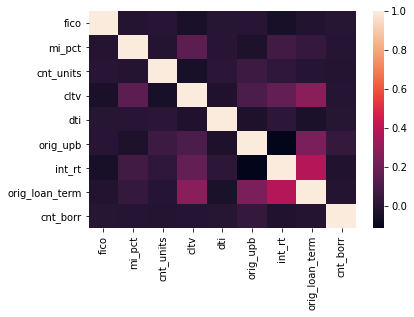

In [4]:
sample_df= pd.read_csv('D:\Franddie Mea\d90_perfor - Copy.csv', sep=",") 
sample_df2= sample_df

import seaborn as sns
import matplotlib.pyplot as plt  

sns.heatmap(sample_df[['fico', 'mi_pct', 'cnt_units', 'cltv', 'dti', 'orig_upb', 'int_rt','orig_loan_term', 'cnt_borr']].corr())


In [5]:
sample_df= fillNAN_orig(sample_df)
sample_df= sample_df[['fico','flag_fthb', "mi_pct",'cnt_units', 'occpy_sts', 'cltv', 'dti', 'orig_upb',  'int_rt',
                 'channel', 'ppmt_pnlty', 'prop_type', 'loan_purpose', 'orig_loan_term', 'cnt_borr', 'ever_d90']]
sample_df.columns

Index(['fico', 'flag_fthb', 'mi_pct', 'cnt_units', 'occpy_sts', 'cltv', 'dti',
       'orig_upb', 'int_rt', 'channel', 'ppmt_pnlty', 'prop_type',
       'loan_purpose', 'orig_loan_term', 'cnt_borr', 'ever_d90'],
      dtype='object')

In [6]:
sample_df.isnull().sum()

fico              0
flag_fthb         0
mi_pct            0
cnt_units         0
occpy_sts         0
cltv              0
dti               0
orig_upb          0
int_rt            0
channel           0
ppmt_pnlty        0
prop_type         0
loan_purpose      0
orig_loan_term    0
cnt_borr          0
ever_d90          0
dtype: int64

In [7]:
for i in sample_df.columns.tolist():
    print(sample_df[i].value_counts())

786    377
790    374
791    373
784    373
773    363
      ... 
536      1
535      1
533      1
527      1
850      1
Name: fico, Length: 331, dtype: int64
N    39341
X     6066
Y     4097
Name: flag_fthb, dtype: int64
0     42669
25     2657
30     1769
12     1149
35      614
17      293
6       154
X        43
27       29
32       26
18       18
16       17
14       17
22       16
40        8
20        8
37        5
13        4
9         4
26        1
19        1
33        1
8         1
Name: mi_pct, dtype: int64
1    48492
2      799
3      114
4       99
Name: cnt_units, dtype: int64
P    45473
S     2368
I     1663
Name: occpy_sts, dtype: int64
80     10036
95      3384
90      3248
70      1622
75      1259
       ...  
106        1
107        1
110        1
113        1
118        1
Name: cltv, Length: 112, dtype: int64
X     1590
35    1538
33    1501
38    1482
34    1471
      ... 
5       61
4       37
3       27
2       11
1       10
Name: dti, Length: 66, dtype: int64


In [8]:
sample_df['int_rt_range']='null'

for i in range(len(sample_df['int_rt'])): 
    if  sample_df.loc[i, 'int_rt'] >4.249  and sample_df.loc[i, 'int_rt']<=  5.5:
        sample_df.loc[i,  'int_rt_range'] ='(4.249, 5.5]'     
    elif  sample_df.loc[i, 'int_rt'] >5.5 and sample_df.loc[i, 'int_rt'] <=5.75:
        sample_df.loc[i,  'int_rt_range'] = '(5.5, 5.75]'    
    elif sample_df.loc[i, 'int_rt'] >5.75 and sample_df.loc[i, 'int_rt']<=6.0:
        sample_df.loc[i,  'int_rt_range'] = '(5.75, 6.0]'
    elif sample_df.loc[i, 'int_rt'] >6.0 and sample_df.loc[i, 'int_rt']<=6.495:
        sample_df.loc[i,  'int_rt_range'] = '(6.0, 6.495]'
    elif sample_df.loc[i, 'int_rt'] >6.495 and sample_df.loc[i, 'int_rt']<= 8.375:
        sample_df.loc[i,  'int_rt_range'] = '(6.495, 8.375]'

<ipython-input-8-8d5dd0f32352>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['int_rt_range']='null'
D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [9]:
print(sample_df.groupby(sample_df['int_rt_range'])['ever_d90'].mean())
print(sample_df['int_rt_range'].value_counts())

int_rt_range
(4.249, 5.5]      0.006869
(5.5, 5.75]       0.011513
(5.75, 6.0]       0.015580
(6.0, 6.495]      0.023216
(6.495, 8.375]    0.033204
Name: ever_d90, dtype: float64
(5.75, 6.0]       14121
(4.249, 5.5]      12811
(5.5, 5.75]       12160
(6.0, 6.495]       7581
(6.495, 8.375]     2831
Name: int_rt_range, dtype: int64


In [10]:
sample_df['dti_range']='X' 

for i in range(len(sample_df['dti'])): 
    if sample_df.loc[i, 'dti']=='X':
        sample_df.loc[i,  'dti_range'] = 'X'
    elif  sample_df.loc[i, 'dti'] >0.999  and sample_df.loc[i, 'dti']<=  10.0:
        sample_df.loc[i,  'dti_range'] ='(0.999, 10.0]'     
    elif  sample_df.loc[i, 'dti'] >10.0 and sample_df.loc[i, 'dti'] <=25:
        sample_df.loc[i,  'dti_range'] = '(10.0, 25.0]'  
    elif  sample_df.loc[i, 'dti'] >25.0 and sample_df.loc[i, 'dti'] <=25:
        sample_df.loc[i,  'dti_range'] = '(10.0, 25.0]'          
    elif sample_df.loc[i, 'dti'] >25 and sample_df.loc[i, 'dti']<=35.0:
        sample_df.loc[i,  'dti_range'] = '(25.0, 35.0]'
    elif sample_df.loc[i, 'dti'] >35.0 and sample_df.loc[i, 'dti']<=44:
        sample_df.loc[i,  'dti_range'] = '(35.0, 44.0]'
    elif sample_df.loc[i, 'dti'] >44 and sample_df.loc[i, 'dti']<= 60:
        sample_df.loc[i,  'dti_range'] = '(44.0, 60.0]' 
    elif sample_df.loc[i, 'dti'] >60 and sample_df.loc[i, 'dti']<= 65.0:
        sample_df.loc[i,  'dti_range'] = '(60.0, 65.0]' 
         

<ipython-input-10-9b1378c48653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['dti_range']='X'


In [11]:
print(sample_df.groupby(sample_df['dti_range'])['ever_d90'].mean())
print(sample_df['dti_range'].value_counts())

dti_range
(0.999, 10.0]    0.006889
(10.0, 25.0]     0.008613
(25.0, 35.0]     0.012636
(35.0, 44.0]     0.016953
(44.0, 60.0]     0.019166
(60.0, 65.0]     0.017801
X                0.018868
Name: ever_d90, dtype: float64
(25.0, 35.0]     13454
(35.0, 44.0]     12446
(44.0, 60.0]     10435
(10.0, 25.0]      9753
X                 1590
(60.0, 65.0]       955
(0.999, 10.0]      871
Name: dti_range, dtype: int64


In [12]:
sample_df['mi_type']='X' 
sample_df.loc[sample_df['mi_pct']!='X', 'mi_type']= ['With_MI' if x>0 else 'Without_MI' for x in sample_df.loc[sample_df['mi_pct']!='X','mi_pct']]

<ipython-input-12-8826a0793f8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['mi_type']='X'
D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
print(sample_df.groupby(sample_df['mi_type'])['ever_d90'].mean())
print(sample_df['mi_type'].value_counts())

mi_type
With_MI       0.033863
Without_MI    0.011413
X             0.023256
Name: ever_d90, dtype: float64
Without_MI    42669
With_MI        6792
X                43
Name: mi_type, dtype: int64


In [14]:
sample_df['upb_range']='X' 

for i in range(len(sample_df["orig_upb"])): 
    if sample_df.loc[i, "orig_upb"]=='X':
        sample_df.loc[i,  'upb_range'] = 'X'
    elif  sample_df.loc[i, "orig_upb"] >9999.999  and sample_df.loc[i, "orig_upb"]<=  20000.0:
        sample_df.loc[i,  'upb_range'] ='(9999.999, 20000.0]'     
    elif  sample_df.loc[i, "orig_upb"] >20000.0 and sample_df.loc[i, "orig_upb"] <=120000.0:
        sample_df.loc[i,  'upb_range'] = '(20000.0, 120000.0]'  
    elif  sample_df.loc[i, "orig_upb"] >120000.0 and sample_df.loc[i, "orig_upb"] <=200000.0:
        sample_df.loc[i,  'upb_range'] = '(120000.0, 200000.0]'          
    elif sample_df.loc[i, "orig_upb"] >200000.0 and sample_df.loc[i, "orig_upb"]<=330000.0:
        sample_df.loc[i,  'upb_range'] = '(200000.0, 330000.0]'
    elif sample_df.loc[i, "orig_upb"] >330000.0 and sample_df.loc[i, "orig_upb"]<=420000.0:
        sample_df.loc[i,  'upb_range'] = '(330000.0, 420000.0]'
    elif sample_df.loc[i, "orig_upb"] >420000.0 and sample_df.loc[i, "orig_upb"]<= 692000.0:
        sample_df.loc[i,  'upb_range'] = '(420000.0, 692000.0]'  

<ipython-input-14-90eb17458113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['upb_range']='X'


In [15]:
print(sample_df.groupby(sample_df['upb_range'])['ever_d90'].mean())
print(sample_df['upb_range'].value_counts())

upb_range
(120000.0, 200000.0]    0.014070
(20000.0, 120000.0]     0.017059
(200000.0, 330000.0]    0.012535
(330000.0, 420000.0]    0.010895
(420000.0, 692000.0]    0.011111
(9999.999, 20000.0]     0.022222
Name: ever_d90, dtype: float64
(120000.0, 200000.0]    17200
(20000.0, 120000.0]     16707
(200000.0, 330000.0]    12525
(330000.0, 420000.0]     2937
(420000.0, 692000.0]       90
(9999.999, 20000.0]        45
Name: upb_range, dtype: int64


In [16]:
sample_df['fico_range']='X' 

for i in range(len(sample_df['fico'])): 
    if sample_df.loc[i, 'fico']=='X':
        sample_df.loc[i,  'fico_range'] = 'X'
    elif  sample_df.loc[i, 'fico'] >299.999  and sample_df.loc[i, 'fico']<=  580.0:
        sample_df.loc[i,  'fico_range'] ='(299.999, 580.0]'     
    elif  sample_df.loc[i, 'fico'] >580.0 and sample_df.loc[i, 'fico'] <=610.0:
        sample_df.loc[i,  'fico_range'] = '(580.0, 610.0]'  
    elif  sample_df.loc[i, 'fico'] >610.0 and sample_df.loc[i, 'fico'] <=673.0:
        sample_df.loc[i,  'fico_range'] = '(610.0, 673.0]'          
    elif sample_df.loc[i, 'fico'] >673.0 and sample_df.loc[i, 'fico']<=749.0:
        sample_df.loc[i,  'fico_range'] = '(673.0, 749.0]'
    elif sample_df.loc[i, 'fico'] >749.0 and sample_df.loc[i,  'fico']<=779.0:
        sample_df.loc[i,  'fico_range'] = '(749.0, 779.0]'
    elif sample_df.loc[i, 'fico'] >779.0 and sample_df.loc[i, 'fico']<= 850.0:
        sample_df.loc[i,  'fico_range'] = '(779.0, 850.0]'  
 

<ipython-input-16-e19bcfb509e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['fico_range']='X'


In [17]:
print(sample_df.groupby(sample_df['fico_range'])['ever_d90'].mean())
print(sample_df['fico_range'].value_counts())

fico_range
(299.999, 580.0]    0.076453
(580.0, 610.0]      0.087294
(610.0, 673.0]      0.034988
(673.0, 749.0]      0.012034
(749.0, 779.0]      0.004402
(779.0, 850.0]      0.001538
X                   0.083333
Name: ever_d90, dtype: float64
(673.0, 749.0]      19943
(749.0, 779.0]       9768
(779.0, 850.0]       9751
(610.0, 673.0]       8660
(580.0, 610.0]       1031
(299.999, 580.0]      327
X                      24
Name: fico_range, dtype: int64


In [18]:
sample_df['cltv_range']='X' 

for i in range(len(sample_df['cltv'])): 
    if sample_df.loc[i, 'cltv']=='X':
        sample_df.loc[i,  'cltv_range'] = 'X'
    elif  sample_df.loc[i, 'cltv'] >5.999 and sample_df.loc[i, 'cltv']<=  67.0:
        sample_df.loc[i,  'cltv_range'] ='(5.999, 67.0]'     
    elif  sample_df.loc[i, 'cltv'] >67.0 and sample_df.loc[i, 'cltv'] <=80.0:
        sample_df.loc[i,  'cltv_range'] = '(67.0, 80.0]'  
    elif  sample_df.loc[i, 'cltv'] >80.0 and sample_df.loc[i, 'cltv'] <=100.0:
        sample_df.loc[i,  'cltv_range'] = '(80.0, 100.0]'          
    elif sample_df.loc[i, 'cltv'] >100.0 and sample_df.loc[i, 'cltv']<=153.0:
        sample_df.loc[i,  'cltv_range'] = '(100.0, 153.0]' 

<ipython-input-18-e2ab6396a653>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['cltv_range']='X'


In [19]:
print(sample_df.groupby(sample_df['cltv_range'])['ever_d90'].mean())
print(sample_df['cltv_range'].value_counts())

cltv_range
(100.0, 153.0]    0.033333
(5.999, 67.0]     0.007920
(67.0, 80.0]      0.013968
(80.0, 100.0]     0.025142
X                 0.000000
Name: ever_d90, dtype: float64
(67.0, 80.0]      21263
(5.999, 67.0]     16793
(80.0, 100.0]     11415
(100.0, 153.0]       30
X                     3
Name: cltv_range, dtype: int64


In [20]:
sample_df['term_type']='X' 

for i in range(len(sample_df['orig_loan_term'])): 
    if sample_df.loc[i, 'orig_loan_term']==180:
        sample_df.loc[i,  'term_type'] = '180'
    elif  sample_df.loc[i, 'orig_loan_term']==240:
        sample_df.loc[i,  'term_type'] ='240'     
    elif  sample_df.loc[i, 'orig_loan_term']==360:
        sample_df.loc[i,  'term_type'] ='360'   
    else:
        sample_df.loc[i,  'term_type'] ='Others' 

<ipython-input-20-d735ad9e1d55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['term_type']='X'


In [21]:
print(sample_df.groupby(sample_df['term_type'])['ever_d90'].mean())
print(sample_df['term_type'].value_counts())

term_type
180       0.006250
240       0.011098
360       0.016631
Others    0.005426
Name: ever_d90, dtype: float64
360       38241
180        7360
240        2613
Others     1290
Name: term_type, dtype: int64


In [22]:
sample_df_clear= prepare_data_for_model(sample_df)
sample_df_clear.columns

Index(['fico', 'flag_fthb', 'mi_pct', 'cnt_units', 'occpy_sts', 'cltv', 'dti',
       'orig_upb', 'int_rt', 'channel', 'ppmt_pnlty', 'prop_type',
       'loan_purpose', 'orig_loan_term', 'cnt_borr', 'ever_d90',
       'int_rt_range', 'dti_range', 'mi_type', 'upb_range', 'fico_range',
       'cltv_range', 'term_type', 'flag_fthbN', 'flag_fthbX', 'flag_fthbY',
       'occpy_stsI', 'occpy_stsP', 'occpy_stsS', 'channelR', 'channelT',
       'ppmt_pnltyN', 'ppmt_pnltyX', 'ppmt_pnltyY', 'prop_typeCO',
       'prop_typeCP', 'prop_typeMH', 'prop_typePU', 'prop_typeSF',
       'loan_purposeC', 'loan_purposeN', 'loan_purposeP',
       'fico(299.999, 580.0]', 'fico(580.0, 610.0]', 'fico(610.0, 673.0]',
       'fico(673.0, 749.0]', 'fico(749.0, 779.0]', 'fico(779.0, 850.0]',
       'ficoX', 'cltv(100.0, 153.0]', 'cltv(5.999, 67.0]', 'cltv(67.0, 80.0]',
       'cltv(80.0, 100.0]', 'cltvX', 'mi_pctWith_MI', 'mi_pctWithout_MI',
       'mi_pctX', 'cnt_units1', 'cnt_units2', 'cnt_units3', 'cnt_units4',

In [23]:
sample_df_clear= sample_df_clear[['ever_d90','flag_fthbX', 'flag_fthbY',
       'occpy_stsI', 'occpy_stsS', 'channelR', 'channelT',
       'ppmt_pnltyX', 'ppmt_pnltyY', 'prop_typeCO',
       'prop_typeCP', 'prop_typeMH', 'prop_typePU', 
       'loan_purposeC', 'loan_purposeN',  
       'fico(299.999, 580.0]', 'fico(580.0, 610.0]', 'fico(610.0, 673.0]',
       'fico(673.0, 749.0]', 'fico(749.0, 779.0]', 'ficoX', 
       'cltv(100.0, 153.0]', 'cltv(5.999, 67.0]', 'cltv(67.0, 80.0]', 'cltvX', 
       'mi_pctWith_MI', 'mi_pctX', 'cnt_units2', 'cnt_units3', 'cnt_units4',
       'int_rt(4.249, 5.5]',  'int_rt(5.75, 6.0]', 'int_rt(6.0, 6.495]', 'int_rt(6.495, 8.375]',
       'orig_upb(120000.0, 200000.0]', 'orig_upb(200000.0, 330000.0]', 'orig_upb(330000.0, 420000.0]',
       'orig_upb(420000.0, 692000.0]', 'orig_upb(9999.999, 20000.0]',
       'cnt_borr2', 'cnt_borrX', 'dti(0.999, 10.0]',
       'dti(10.0, 25.0]', 'dti(35.0, 44.0]', 'dti(44.0, 60.0]', 'dti(60.0, 65.0]', 'dtiX', 
       'loan_term180', 'loan_term240',   'loan_termOthers']]

<AxesSubplot:>

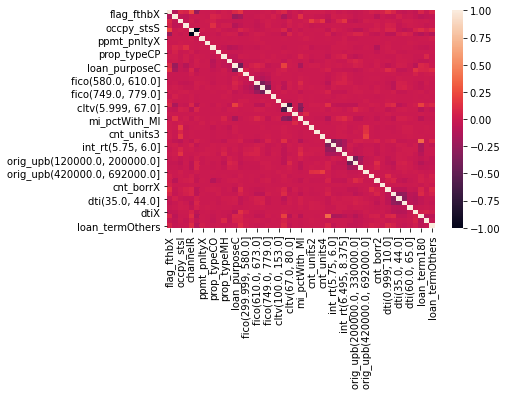

In [24]:
# plot the correlation plot to explore the correlation among the numeric variables, 
# reduce the interdependency among variables to aviod the issue of multicollinearity, especially when building the logistic regression model
#calculate the correlation and plot the correlation graph 
corr_matrix = sample_df_clear.drop(columns='ever_d90').corr()
sns.heatmap(corr_matrix)

In [25]:
X= sample_df_clear.drop(columns='ever_d90')

y= sample_df_clear['ever_d90']

In [26]:
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

scaler= StandardScaler()
scaler.fit(X)
trans_df= scaler.transform(X)
retrans_df= scaler.inverse_transform(trans_df)  
trans_df= pd.DataFrame(trans_df)

In [27]:
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

# split 30% into the test set

from sklearn.model_selection import train_test_split, GridSearchCV 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)
model_list = {} #to store the models

In [28]:
# use the GridSearch to select the best parameters based on 5 times cross-validation
# build the Logistic Regression Model using the optimal parameters
# the prediction accuracy is about 98.7%

from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 5, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model1 = LogisticRegression(**grid.best_params_,penalty='l2',multi_class='auto')
logit_model1.fit(X_train, y_train)
model_list['logit_model'] = logit_model1
logit_model1.score(X_test, y_test)

{'C': 1}


0.9874091031510908

In [29]:
def prob(a):
    prob = 1 / (1 + math.exp(-a))
    return prob 
predict = pd.DataFrame( X*logit_model1.coef_)

predict['log_prob'] = pd.DataFrame(logit_model1.predict_proba(retrans_df))[1] 

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(logit_model1.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)
 
val_log = pd.concat([sample_df,predict.iloc[:,-2:]],axis = 1)   

In [30]:
val_log.head(5)

,fico,flag_fthb,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,int_rt,channel,...,ever_d90,int_rt_range,dti_range,mi_type,upb_range,fico_range,cltv_range,term_type,log_prob,self_cal
0,577,X,0,1,P,62,41,270000,5.125,R,...,0,"(4.249, 5.5]","(35.0, 44.0]",Without_MI,"(200000.0, 330000.0]","(299.999, 580.0]","(5.999, 67.0]",180,0.012568,0.012725
1,800,N,0,1,P,30,33,250000,5.125,T,...,0,"(4.249, 5.5]","(25.0, 35.0]",Without_MI,"(200000.0, 330000.0]","(779.0, 850.0]","(5.999, 67.0]",180,0.000816,0.000817
2,608,N,0,1,P,62,24,126000,5.375,T,...,0,"(4.249, 5.5]","(10.0, 25.0]",Without_MI,"(120000.0, 200000.0]","(580.0, 610.0]","(5.999, 67.0]",240,0.021191,0.021636
3,794,N,0,1,P,67,32,230000,5.250,T,...,0,"(4.249, 5.5]","(25.0, 35.0]",Without_MI,"(200000.0, 330000.0]","(779.0, 850.0]","(5.999, 67.0]",180,0.002248,0.002253
4,710,N,0,1,P,80,20,95000,5.250,R,...,0,"(4.249, 5.5]","(10.0, 25.0]",Without_MI,"(20000.0, 120000.0]","(673.0, 749.0]","(67.0, 80.0]",180,0.001718,0.001721


In [31]:
def fillNAN_orig2(df):  
    df.loc[df['flag_fthb']=='9','flag_fthb']='X'
    df.loc[df['cnt_borr']==99,'cnt_borr']=0
    df.loc[df['cnt_units']==99,'cnt_units']=0
    df.loc[df['fico']==9999, 'fico']=0
    df.loc[df['cltv']==999, 'cltv']=0
    df.loc[df['dti']==999, 'dti']=0
    df.loc[df['mi_pct']==999,'mi_pct']=0
    df.loc[df['occpy_sts']==9,'occpy_sts']='X'
    df.loc[df['channel'] ==9, 'channel']='X'
    df['ppmt_pnlty'] = df['ppmt_pnlty'].fillna('X')
    df.loc[df['prop_type'] ==99,  'prop_type']='X'
    df.loc[df['loan_purpose'] ==9, 'loan_purpose']='X' 
    return df
    return df

In [32]:
def prepare_data_for_model2(df):
    dummies1 = pd.get_dummies(df['flag_fthb'] ).rename(columns=lambda x: 'flag_fthb' + str(x))
    train_df = pd.concat([df, dummies1], axis=1)
    
    dummies2 = pd.get_dummies(df['occpy_sts'] ).rename(columns=lambda x: 'occpy_sts' + str(x)) 
    train_df = pd.concat([train_df, dummies2], axis=1)
    
    dummies3 = pd.get_dummies(df['channel'] ).rename(columns=lambda x: 'channel' + str(x)) 
    train_df = pd.concat([train_df, dummies3], axis=1)
    
    dummies4 = pd.get_dummies(df['ppmt_pnlty'] ).rename(columns=lambda x: 'ppmt_pnlty' + str(x)) 
    train_df = pd.concat([train_df, dummies4], axis=1)
    
    dummies5 = pd.get_dummies(df['prop_type'] ).rename(columns=lambda x: 'prop_type' + str(x)) 
    train_df = pd.concat([train_df, dummies5], axis=1) 
    
    dummies6 = pd.get_dummies(df['loan_purpose'] ).rename(columns=lambda x: 'loan_purpose' + str(x)) 
    train_df = pd.concat([train_df, dummies6], axis=1)
     
    return train_df

In [33]:
sample_df3= pd.read_csv('D:\Franddie Mea\d90_perfor - Copy.csv', sep=",") 
sample_df3= fillNAN_orig2(sample_df3)
imp_fill=SimpleImputer(missing_values=0, strategy='most_frequent') 
sample_fill=sample_df3.loc[:, ['fico','dti','cltv', 'cnt_borr', 'mi_pct', 'cnt_units']] 
imp_mode= imp_fill.fit_transform(sample_fill)
sample_df3.loc[:,['fico','dti','cltv', 'cnt_borr', 'mi_pct', 'cnt_units']]=imp_mode
sample_df3=prepare_data_for_model2(sample_df3)
sample_df3.drop(columns=['id_loan','cd_msa','zipcode', 'dt_first_pi','dt_matr','ltv','seller_name', 
                         'servicer_name', 'prod_type', 'st','flag_sc','id_loan_preharp', 'ind_afdl',
                         'ind_harp', 'cd_ppty_val_type', 'schedule_pay', 'zero_code', 'ltv_range', 'upb_range',
                         'fico_range','mi_type', 'cltv_range', 'dti_range', 'int_rt_range'],inplace=True) 

In [34]:
sample_df3.columns

Index(['fico', 'flag_fthb', 'mi_pct', 'cnt_units', 'occpy_sts', 'cltv', 'dti',
       'orig_upb', 'int_rt', 'channel', 'ppmt_pnlty', 'prop_type',
       'loan_purpose', 'orig_loan_term', 'cnt_borr', 'ever_d90', 'flag_fthbN',
       'flag_fthbX', 'flag_fthbY', 'occpy_stsI', 'occpy_stsP', 'occpy_stsS',
       'channelR', 'channelT', 'ppmt_pnltyN', 'ppmt_pnltyX', 'ppmt_pnltyY',
       'prop_typeCO', 'prop_typeCP', 'prop_typeMH', 'prop_typePU',
       'prop_typeSF', 'loan_purposeC', 'loan_purposeN', 'loan_purposeP'],
      dtype='object')

<AxesSubplot:>

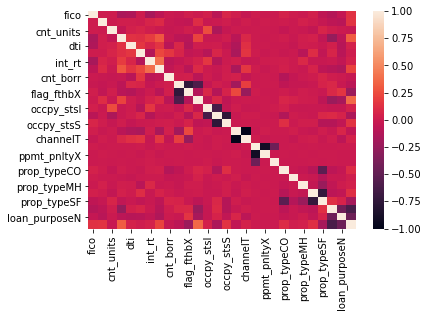

In [35]:
# plot the correlation plot to explore the correlation among the numeric variables, 
# reduce the interdependency among variables to aviod the issue of multicollinearity, especially when building the logistic regression model
 
import seaborn as sns
import matplotlib.pyplot as plt  

#calculate the correlation and plot the correlation graph
corr_matrix = sample_df3.drop(columns=['ever_d90']).corr()
sns.heatmap(corr_matrix)

In [36]:
sample_df3_clear= sample_df3[['fico', 'cnt_units','mi_pct', 'orig_loan_term' ,'cltv', 'dti','orig_upb', 'int_rt', 'cnt_borr',  
                              'flag_fthbX', 'flag_fthbY', 'occpy_stsI', 'occpy_stsS',
                              'channelR', 'channelT', 'ppmt_pnltyX', 'ppmt_pnltyY',  'prop_typeCO',
                              'prop_typeCP', 'prop_typeMH', 'prop_typePU', 'loan_purposeC',
                              'loan_purposeN', 'ever_d90' ]]  
X2=sample_df3_clear.drop(columns='ever_d90')
y2=sample_df3_clear['ever_d90']  

In [37]:
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

scaler= StandardScaler()
scaler.fit(X2)
trans_df= scaler.transform(X2)
retrans_df= scaler.inverse_transform(trans_df)  
trans_df= pd.DataFrame(trans_df)

In [38]:
X_train2= X2.loc[X_train.index]
X_test2 = X2.loc[X_test.index]
y_train2 = y2.loc[y_train.index]
y_test2 = y2.loc[y_test.index] 

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV 
# use the GridSearch to select the best parameters based on 5 times cross-validation
# build the Random Forest Model using the optimal parameters
# the prediction accuracy is about 98.7%

from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring = "roc_auc")
grid.fit(X_train2, y_train2)
print(grid.best_params_)

{'max_depth': 8, 'n_estimators': 300}


In [40]:
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train2, y_train2)
model_list['rf_model'] = rf_model 

In [41]:
val_rf = pd.concat([sample_df3_clear,pd.DataFrame(rf_model.predict_proba(retrans_df))[[1]]],axis = 1)
val_rf.rename(columns = {1:'rf_prob'}, inplace = True)
val_rf['rf_pre']= pd.DataFrame([1 if x >= 0.015 else 0 for x in val_rf['rf_prob']]) 
rf_model.score(X_test2, y_test2)

0.9874091031510908

In [42]:
val_rf.head(5)

,fico,cnt_units,mi_pct,orig_loan_term,cltv,dti,orig_upb,int_rt,cnt_borr,flag_fthbX,...,ppmt_pnltyY,prop_typeCO,prop_typeCP,prop_typeMH,prop_typePU,loan_purposeC,loan_purposeN,ever_d90,rf_prob,rf_pre
0,577,1,25,180,62,41,270000,5.125,2,1,...,0,0,0,0,0,0,1,0,0.060562,1
1,800,1,25,180,30,33,250000,5.125,2,0,...,0,0,0,0,0,0,0,0,0.002051,0
2,608,1,25,240,62,24,126000,5.375,2,0,...,0,0,0,0,0,1,0,0,0.044981,1
3,794,1,25,180,67,32,230000,5.250,1,0,...,0,0,0,0,1,0,1,0,0.004228,0
4,710,1,25,180,80,20,95000,5.250,2,0,...,0,0,0,1,0,0,0,0,0.003929,0


In [43]:
# use the GridSearch to select the best parameters based on 5 times cross-validation
# build the XGBoost Model using the optimal parameters
# the prediction accuracy is about 98.7%

from xgboost import XGBClassifier
param_grid = {"learning_rate": [0.01, 0.1,0.5], "n_estimators": [100,300,500], 'max_depth':[3,4,5]}
grid = GridSearchCV(XGBClassifier(), param_grid, cv = 5, scoring = "roc_auc")
grid.fit(X_train2, y_train2)
print("best hyperparameters through grid search: ", grid.best_params_)
xgb_model = XGBClassifier(**grid.best_params_)
xgb_model.fit(X_train2, y_train2)
model_list['xgb_model'] = xgb_model

D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:46:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best hyperparameters through grid search:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
[00:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
val_xgb = pd.concat([sample_df3_clear,pd.DataFrame(xgb_model.predict_proba(retrans_df))[[1]]],axis = 1)
val_xgb.rename(columns = {1:'xgb_prob'}, inplace = True)
val_xgb['xgb_pre']= pd.DataFrame([1 if x >= 0.015 else 0 for x in val_xgb['xgb_prob']])  
xgb_model.score(X_test2, y_test2)

0.9874091031510908

In [45]:
val_xgb.head(5)

,fico,cnt_units,mi_pct,orig_loan_term,cltv,dti,orig_upb,int_rt,cnt_borr,flag_fthbX,...,ppmt_pnltyY,prop_typeCO,prop_typeCP,prop_typeMH,prop_typePU,loan_purposeC,loan_purposeN,ever_d90,xgb_prob,xgb_pre
0,577,1,25,180,62,41,270000,5.125,2,1,...,0,0,0,0,0,0,1,0,0.038093,1
1,800,1,25,180,30,33,250000,5.125,2,0,...,0,0,0,0,0,0,0,0,0.000514,0
2,608,1,25,240,62,24,126000,5.375,2,0,...,0,0,0,0,0,1,0,0,0.026415,1
3,794,1,25,180,67,32,230000,5.250,1,0,...,0,0,0,0,1,0,1,0,0.001950,0
4,710,1,25,180,80,20,95000,5.250,2,0,...,0,0,0,1,0,0,0,0,0.002787,0


In [46]:
all_mod= pd.concat([val_rf, val_xgb.iloc[:,-2:], val_log.iloc[:,-2:]],axis = 1)   
all_test= all_mod.iloc[y_test.index]
all_test.head()

,fico,cnt_units,mi_pct,orig_loan_term,cltv,dti,orig_upb,int_rt,cnt_borr,flag_fthbX,...,prop_typePU,loan_purposeC,loan_purposeN,ever_d90,rf_prob,rf_pre,xgb_prob,xgb_pre,log_prob,self_cal
3150,761,1,25,360,89,60,137000,5.750,1,1,...,0,0,1,0,0.021972,1,0.013210,0,0.011821,0.011960
12457,622,1,17,360,90,31,164000,5.625,2,0,...,1,0,0,0,0.028897,1,0.039312,1,0.021494,0.021951
19647,707,1,12,300,82,35,106000,6.000,1,0,...,0,0,1,0,0.019030,1,0.020703,1,0.035578,0.036819
12946,797,1,25,360,34,41,356000,5.750,1,0,...,0,0,1,0,0.013166,0,0.001193,0,0.005084,0.005110
43928,678,1,25,360,80,48,124000,6.125,1,0,...,0,0,0,0,0.023120,1,0.033785,1,0.025169,0.025794


In [47]:
order_log=all_test.groupby(pd.qcut(all_test['log_prob'].sort_values(ascending=False),20,duplicates = 'drop'))[['ever_d90', 'log_prob']].mean().sort_values(by='ever_d90', ascending=False)
order_log

,ever_d90,log_prob
log_prob,,
"(0.0567, 0.327]",0.063257,0.094009
"(0.0384, 0.0567]",0.032389,0.046718
"(0.0212, 0.0276]",0.030956,0.024068
"(0.0276, 0.0384]",0.028226,0.032350
"(0.012, 0.0145]",0.017520,0.013145
"(0.0145, 0.0173]",0.017497,0.015816
"(0.0173, 0.0212]",0.014825,0.019186
"(0.00708, 0.00827]",0.010767,0.007634
"(0.00827, 0.00991]",0.009434,0.009053


In [48]:
order_rf=all_test.groupby(pd.qcut(all_test['rf_prob'].sort_values(ascending=False),50,duplicates = 'drop'))[['ever_d90', 'rf_prob']].mean().sort_index(ascending=False)
order_rf 

,ever_d90,rf_prob
rf_prob,,
"(0.0698, 0.194]",0.063758,0.088910
"(0.0552, 0.0698]",0.067340,0.062179
"(0.046, 0.0552]",0.050505,0.050320
"(0.0402, 0.046]",0.013468,0.042869
"(0.0357, 0.0402]",0.040404,0.037724
"(0.0319, 0.0357]",0.040404,0.033638
"(0.0288, 0.0319]",0.047138,0.030245
"(0.0262, 0.0288]",0.033670,0.027455
"(0.024, 0.0262]",0.026936,0.025051


In [49]:
order_xgb=all_test.groupby(pd.qcut(all_test['xgb_prob'].sort_values(ascending=False),10,duplicates = 'drop'))[['ever_d90', 'xgb_prob']].mean().sort_index(ascending=False)
order_xgb

,ever_d90,xgb_prob
xgb_prob,,
"(0.0411, 0.346]",0.047106,0.070792
"(0.0235, 0.0411]",0.032997,0.031046
"(0.0149, 0.0235]",0.012795,0.018696
"(0.00969, 0.0149]",0.018855,0.012113
"(0.00606, 0.00969]",0.005387,0.007758
"(0.00383, 0.00606]",0.003367,0.004802
"(0.00266, 0.00383]",0.003367,0.003198
"(0.00188, 0.00266]",0.001347,0.002263
"(0.00104, 0.00188]",0.000000,0.001469


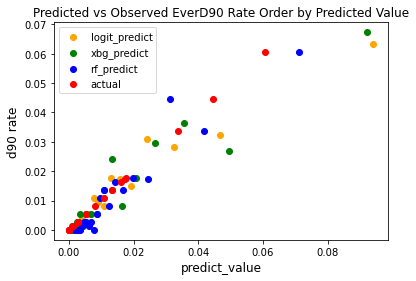

In [50]:

#plt.subplot(111)

a = all_test.groupby(pd.qcut(all_test['log_prob'].sort_values(ascending=False),20,duplicates = 'drop'))[['ever_d90', 'log_prob']].mean()
plt.scatter(a['log_prob'],a['ever_d90'], c= 'orange', label='logit_predict') 


a = all_test.groupby(pd.qcut(all_test['xgb_prob'].sort_values(ascending=False),20,duplicates = 'drop'))[['ever_d90','xgb_prob']].mean() 
#d = all_mod.groupby(pd.qcut(all_mod['xgb_prob'].sort_values(by=['xgb_prob']),50,duplicates = 'drop'))[['ever_d90', 'xgb_prob']].mean()
plt.scatter(a['xgb_prob'],a['ever_d90'], c= 'g', label='xbg_predict')

a = all_test.groupby(pd.qcut(all_test['rf_prob'].sort_values(ascending=False),20,duplicates = 'drop'))[['ever_d90', 'rf_prob']].mean()
#e = all_mod.groupby(pd.qcut(all_mod['rf_prob'].sort_values(by=['rf_prob']),50,duplicates = 'drop'))[['ever_d90', 'rf_prob']].mean()
plt.scatter(a['rf_prob'],a['ever_d90'], c= 'b', label='rf_predict')

#b = sample_df3.groupby(pd.qcut(sample_df3[col],50,duplicates = 'drop'))[[col, 'ever_d90']].mean()
plt.scatter(a['ever_d90'],a['ever_d90'], c= 'r', label='actual') 
plt.title("Predicted vs Observed EverD90 Rate Order by Predicted Value"  )
plt.legend()
plt.xlabel('predict_value', fontsize =12)
plt.ylabel('d90 rate',fontsize =12)    

plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

logit_cv_score = cross_val_score(logit_model1, X, y, cv=10, scoring='roc_auc')
rf_cv_score = cross_val_score(rf_model, X2, y2, cv=10, scoring='roc_auc')
xgb_cv_score = cross_val_score(xgb_model, X2, y2, cv=10, scoring='roc_auc')

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[00:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program Files (x86)\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


=== Confusion Matrix ===
[[10494  4171]
 [   49   138]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.72      0.83     14665
           1       0.03      0.74      0.06       187

    accuracy                           0.72     14852
   macro avg       0.51      0.73      0.45     14852
weighted avg       0.98      0.72      0.82     14852



=== ROC Curve ===


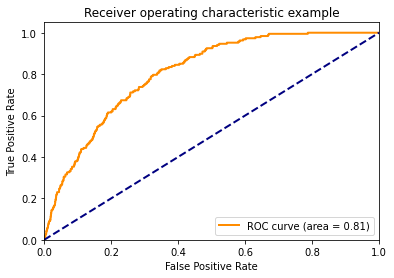

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test,pd.DataFrame([1 if x >= 0.015 else 0 for x in all_test['log_prob']]))) 
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,pd.DataFrame([1 if x >= 0.015 else 0 for x in all_test['log_prob']]))) 
print('\n') 

fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
print("=== ROC Curve ===")
fpr1["micro"], tpr1["micro"], _ = roc_curve(y_test.ravel(), all_mod['log_prob'].loc[y_test.index].ravel())
roc_auc1["micro"] = auc(fpr1["micro"], tpr1["micro"])  
plt.figure()
lw = 2
plt.plot(fpr1["micro"], tpr1["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc1["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [53]:
print("=== All AUC Scores ===")
print(logit_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", logit_cv_score.mean())
print('\n')

=== All AUC Scores ===
[0.86511495 0.79553244 0.81771082 0.86905474 0.83395784 0.80750933
 0.85211949 0.76227592 0.77670579 0.78903723]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8169018549671663




=== Confusion Matrix ===
[[10219  4446]
 [   45   142]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     14665
           1       0.03      0.76      0.06       187

    accuracy                           0.70     14852
   macro avg       0.51      0.73      0.44     14852
weighted avg       0.98      0.70      0.81     14852



=== ROC Curve ===


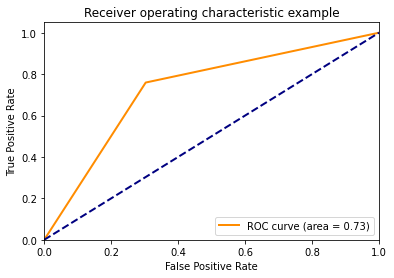

In [54]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test2,pd.DataFrame([1 if x >= 0.015 else 0 for x in all_test['rf_prob']])))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test2,pd.DataFrame([1 if x >= 0.015 else 0 for x in all_test['rf_prob']])))
print('\n')


print("=== ROC Curve ===")
 
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict() 
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test2.ravel(), all_test['rf_pre'].ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])  
plt.figure()
lw = 2
plt.plot(fpr2["micro"], tpr2["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [55]:
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())
print('\n')

=== All AUC Scores ===
[0.87425133 0.80212817 0.81814921 0.85344788 0.82364777 0.79767269
 0.84820168 0.75528734 0.79961904 0.80462166]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8177026767423815




=== Confusion Matrix ===
[[10363  4302]
 [   49   138]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     14665
           1       0.03      0.74      0.06       187

    accuracy                           0.71     14852
   macro avg       0.51      0.72      0.44     14852
weighted avg       0.98      0.71      0.82     14852



=== ROC Curve ===


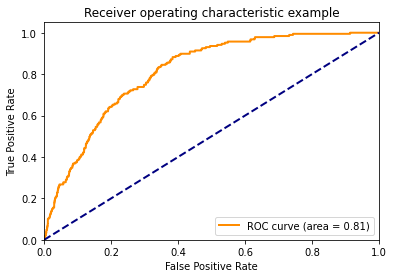

In [56]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test2,pd.DataFrame([1 if x >= 0.015 else 0 for x in all_test['xgb_prob']]) ))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test2,pd.DataFrame([1 if x >= 0.015 else 0 for x in all_test['xgb_prob']]) ))
print('\n')

print("=== ROC Curve ===")

# Compute ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_test2.ravel(), all_test['xgb_prob'].ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])  
plt.figure()
lw = 2
plt.plot(fpr3["micro"], tpr3["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc3["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [57]:
print("=== All AUC Scores ===")
print(xgb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", xgb_cv_score.mean()) 
print('\n')


=== All AUC Scores ===
[0.87226151 0.81355754 0.81358743 0.86494273 0.84116319 0.8144058
 0.85040402 0.76092063 0.79139048 0.80824763]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8230880959344337




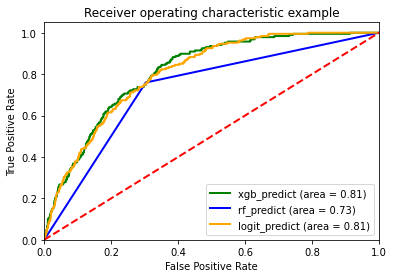

In [58]:

  
plt.figure()
lw = 2
plt.plot(fpr3["micro"], tpr3["micro"], color='g',
         lw=lw, label='xgb_predict (area = %0.2f)' % roc_auc3["micro"])

plt.plot(fpr2["micro"], tpr2["micro"], color='b',
         lw=lw, label='rf_predict (area = %0.2f)' % roc_auc2["micro"])

plt.plot(fpr1["micro"], tpr1["micro"], color='orange',
         lw=lw, label='logit_predict (area = %0.2f)' % roc_auc1["micro"])

plt.plot([0, 1], [0, 1], color='r', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

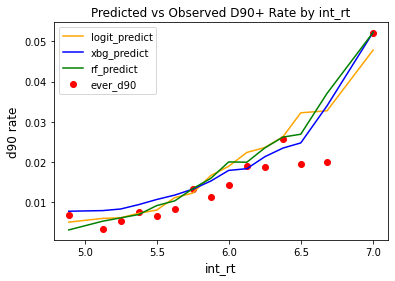

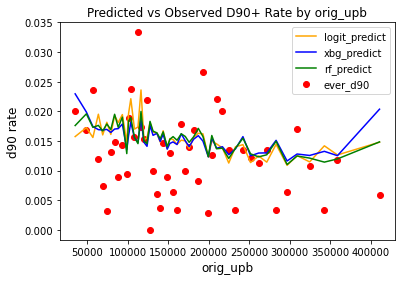

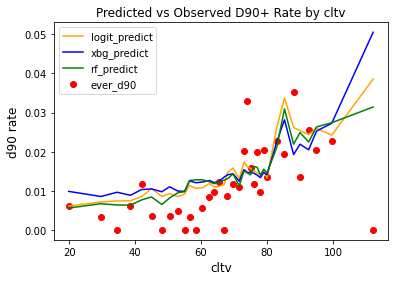

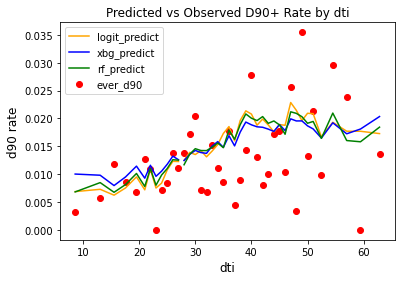

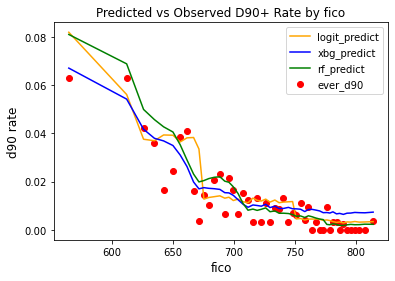

In [59]:
 

continius = ['int_rt', 'orig_upb', 'cltv', 'dti', 'fico']
for col in continius:
    plt.subplot(111)
    a = all_test.groupby(pd.qcut(all_test[col].sort_values(),50,duplicates = 'drop'))[[col, 'log_prob']].mean()
    plt.plot(a[col],a['log_prob'], c= 'orange', label='logit_predict') 
    
    d = all_test.groupby(pd.qcut(all_test[col].sort_values(),50,duplicates = 'drop'))[[col, 'rf_prob']].mean()
    plt.plot(d[col],d['rf_prob'], c= 'b', label='xbg_predict')
    
    e = all_test.groupby(pd.qcut(all_test[col].sort_values(),50,duplicates = 'drop'))[[col, 'xgb_prob']].mean()
    plt.plot(e[col],e['xgb_prob'], c= 'g', label='rf_predict')
    
    #f = val_svm.groupby(pd.qcut(val_svm[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    #plt.plot(f[col],f['prob'], c= 'purple', label='svm_predict') 

    b = all_test.groupby(pd.qcut(all_test[col].sort_values(),50,duplicates = 'drop'))[[col, 'ever_d90']].mean()
    plt.scatter(b[col],b['ever_d90'], c= 'r', label = 'ever_d90')
    plt.title("Predicted vs Observed D90+ Rate by " + col)
    plt.legend()
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 rate',fontsize =12)    

    plt.show()

In [60]:
predict_actual= all_mod[['int_rt', 'orig_upb', 'cltv', 'dti', 'fico','ever_d90', 'rf_prob','xgb_prob','log_prob']]
predict_actual= predict_actual.iloc[y_test.index]

In [61]:
from scipy.stats import norm

def logit_pvalue(model, x): 
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return coefs, p

In [62]:

#X= pd.DataFrame(X)
X.columns=sample_df_clear.drop(columns='ever_d90').columns.tolist()
coefs, p = logit_pvalue(logit_model1, X_train)
X_cols_inc = X.columns.tolist()
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value.sort_values(by=['P_value'])

<ipython-input-61-4b3650fc63f1>:13: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diag(vcov))


,feature,coeffienct,P_value
39,cnt_borr2,-0.888213,0.000000
15,"fico(299.999, 580.0]",2.787134,0.000000
16,"fico(580.0, 610.0]",3.152150,0.000000
17,"fico(610.0, 673.0]",2.134713,0.000000
18,"fico(673.0, 749.0]",1.121235,0.000001
33,"int_rt(6.495, 8.375]",0.500645,0.002779
22,"cltv(5.999, 67.0]",-0.548852,0.004354
32,"int_rt(6.0, 6.495]",0.361376,0.009524
25,mi_pctWith_MI,0.414969,0.016569
9,prop_typeCO,-0.449873,0.036496
